# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ahmad Hanafi
- Email: hanapiahmad07@gmail.com
- Id Dicoding: hanafiiahmd

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Menyiapkan data yang akan digunakan


## Data Understanding

Mengimport data yang akan digunakan

In [2]:
# Ubah URL ke format raw agar bisa diakses langsung
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'

# Baca data dengan delimiter ;
data = pd.read_csv(url, delimiter=';')

# Tampilkan 5 baris pertama
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Melihat tipe data yang akan digunakan, jumlah kolom dan baris masing-masing fitur

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Melihat nilai statistika deskriptif dari data

In [4]:
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Melihat apakah ada data yang hilang atau missing value dalam data

In [5]:
data.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Cek apakah ada duplikat dalam data

In [6]:
data.duplicated().sum()

np.int64(0)

Melihat distribusi dan nilai yang ada pada fitur Status

In [7]:
data['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


## Data Preparation / Preprocessing

In [8]:
data['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Karena data yang akan digunakan untuk keperluan analisis ini adalah Graduate dan Dropout, maka baris yang mengandung nilai Enrolled dihapus

In [9]:
# Hapus baris yang statusnya 'enrolled'
data = data[data['Status'] != 'Enrolled']

# Cek jumlah data setelah dihapus
print(data['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


Cek distribusi pada fitur Status menggunakan pie chart

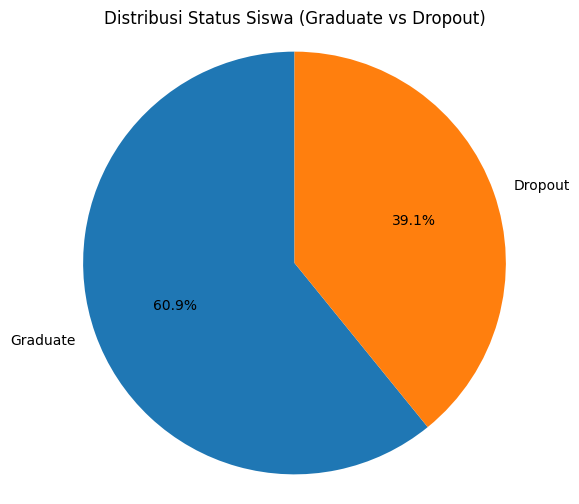

In [10]:
# Hitung jumlah tiap status
status_counts = data['Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Siswa (Graduate vs Dropout)')
plt.axis('equal')
plt.show()

Melakukan label encoding pada kolom kategorikal, untuk proses modelling

In [11]:
dataa_encoded = data.copy()

# Encode semua kolom kategorikal
label_cols = dataa_encoded.select_dtypes(include='object').columns
le = LabelEncoder()

for col in label_cols:
    dataa_encoded[col] = le.fit_transform(dataa_encoded[col])

Cek korelasi setiap fitur yang ada dengan fitur yang menjadi target 'Status'

In [12]:
# Korelasi terhadap status
correlation = dataa_encoded.corr()['Status'].sort_values(ascending=False)
print(correlation)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited               0.052402
GDP                            

Membuat heat map untuk korelasi masing-masing fitur dan untuk lebih jelas dalam melihat korelasi tiap tiap fitur yang ada

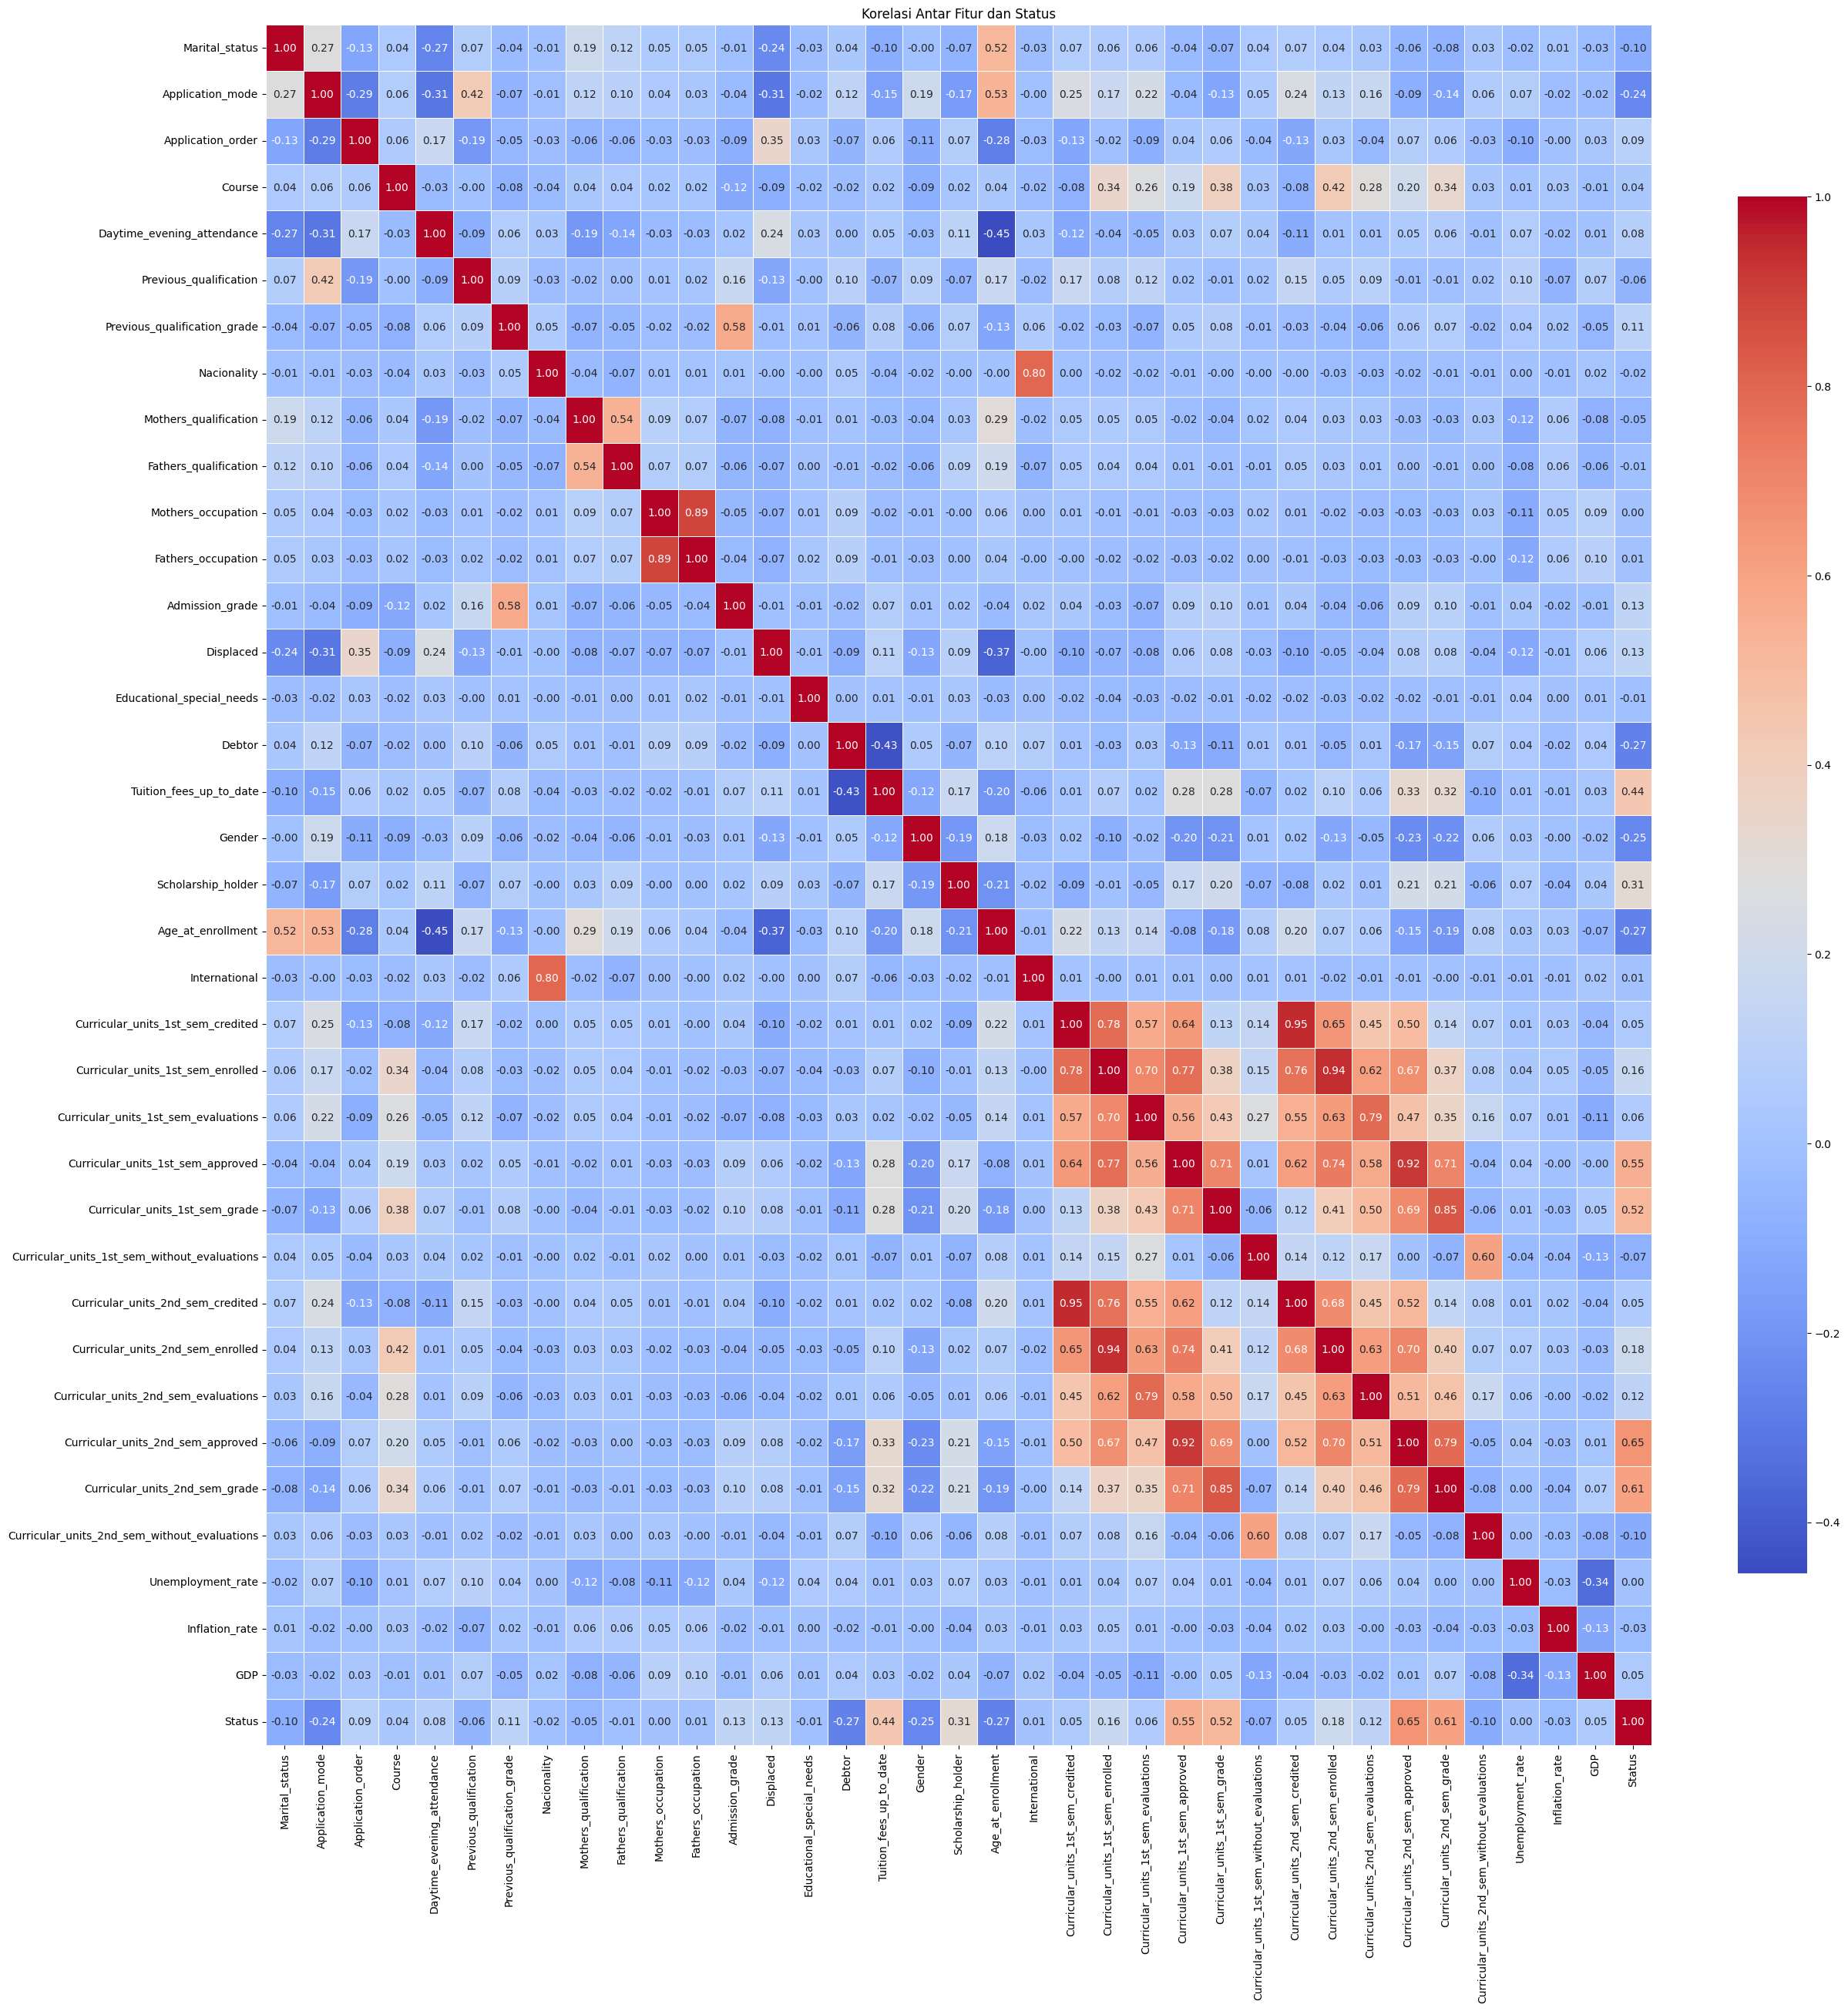

In [13]:
# Hitung korelasi seluruh fitur terhadap Status
correlation_matrix = dataa_encoded.corr()

# Plot heatmap
plt.figure(figsize=(29, 29))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Korelasi Antar Fitur dan Status")
plt.show()

Disini, saya melakukan drop fitur yang memiliki nilai korelasi < 0.1 (untuk nilai korelasi positif) dan nilai korelasi > 0.1 (untuk nilai korelasi negatif)

In [14]:
# Kolom yang akan di-drop
columns_to_drop = [
    'International', 'Fathers_occupation', 'Unemployment_rate', 'Mothers_occupation',
    'Fathers_qualification', 'Educational_special_needs', 'Nacionality', 'Inflation_rate',
    'Mothers_qualification', 'Previous_qualification', 'Curricular_units_1st_sem_without_evaluations',
    'Application_order', 'Daytime_evening_attendance', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_credited', 'GDP', 'Curricular_units_1st_sem_credited', 'Course']

# Drop kolom-kolom tersebut
data_clean = dataa_encoded.drop(columns=columns_to_drop)

# Cek hasil setelah drop kolom
data_clean

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
4420,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
4421,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
4422,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


Setelah dilakukan drop fitur-fitur tersebut, tersisa 19 fitur termasuk kolom target, lalu membuat bar plot untuk melihat korelasi fitur terhadap fitur target 'Status' secara urutan dari yang terbesar korelasinya.

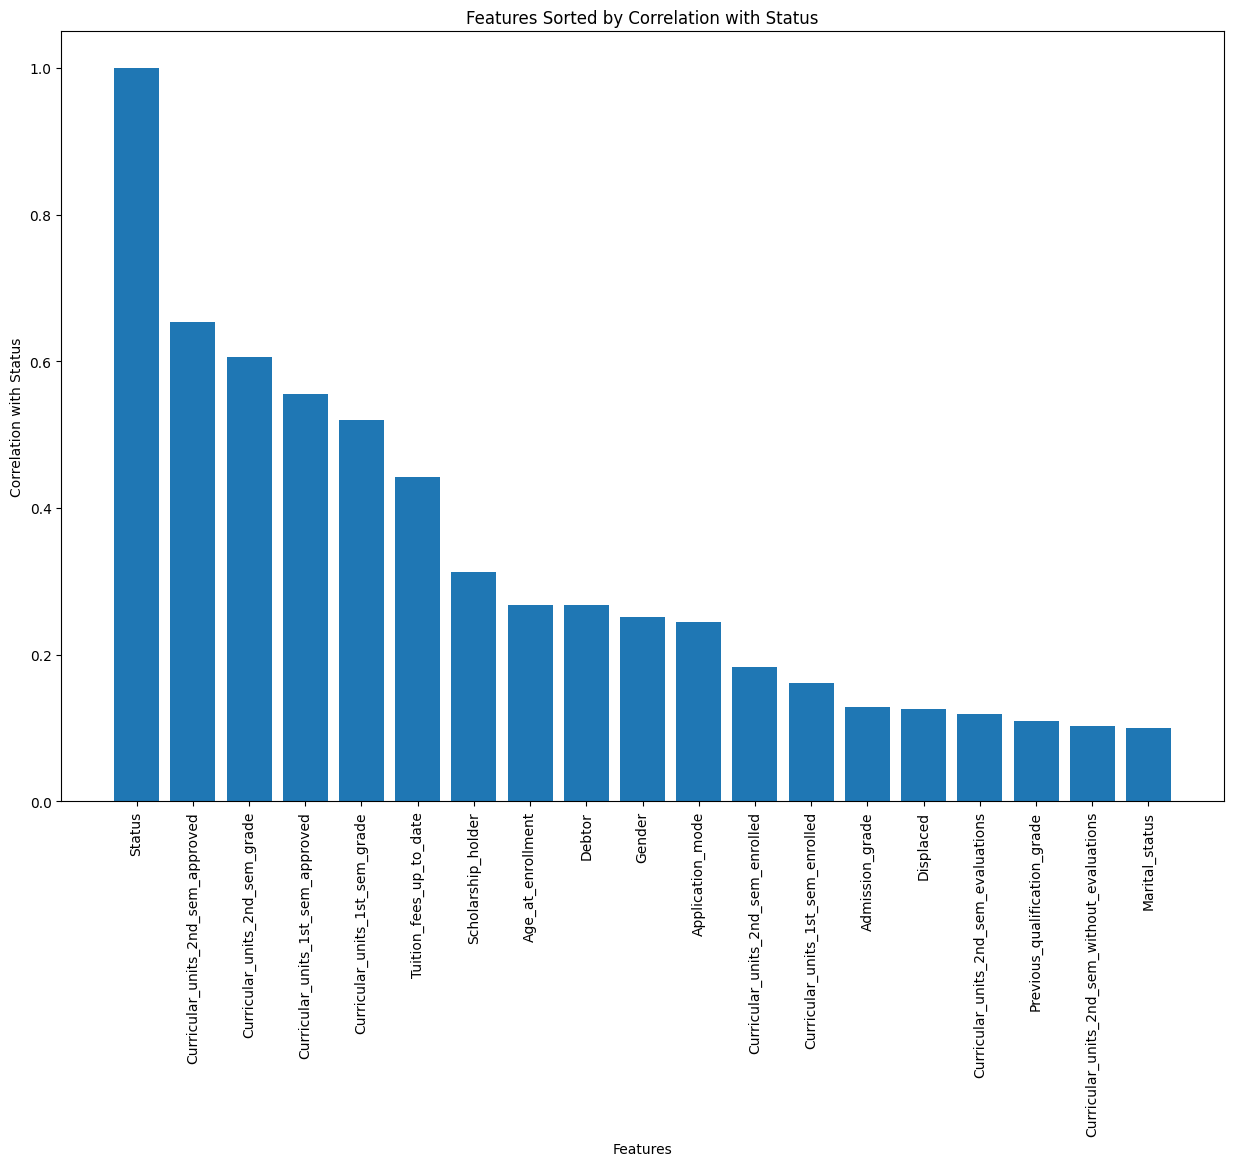

In [15]:
correlations = data_clean.corr()['Status']
sorted_corr = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.xticks(rotation=90)
plt.show()

Melihat statistika deskriptif untuk data terbaru yang telah di proses dan dibersihkan

In [16]:
data_clean.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [17]:
# Pisahkan fitur (X) dan target (Y)
X = data_clean.drop(columns='Status')
y = data_clean['Status']

Melakukan splitting data, dengan proporsi 80% data training dan 20% untuk data testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scaling data latih dan uji secara terpisah
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fitting pada data latih
X_test_scaled = scaler.transform(X_test)

## Modeling

Melakukan modelling data dengan model random forest dengan data yang telah di split tadi

In [20]:
# Membuat dan melatih model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_rf = rf.predict(X_test_scaled)

Melihat feature importance untuk memastikan fitur-fitur yang relevan terhadap kolom target, untuk keperluan melatih model terbaru dengan fitur yang dipilih berdasarkan feature importance ini dan membandingkannya dengan model yang dilatih dengan fitur-fitur yang ada sebelum dilakukan drop fitur setelah feature importance

<Axes: >

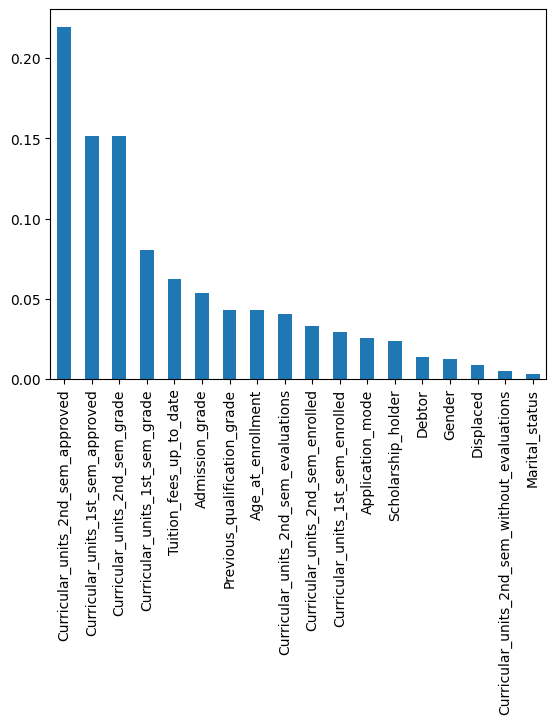

In [21]:
importances = rf.feature_importances_

# Urutkan fitur berdasarkan importance-nya
import pandas as pd
feat_importance = pd.Series(importances, index=X_train.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar')

Melakukan drop fitur yang dianggap kontribusinya tidak terlalu signifikan terhadap model dan membuat dataset baru untuk X_train dan X_test untuk melatih model baru yang akan digunakan nanti

In [24]:
low_importance_features = [
    'Gender',
    'Displaced',
    'Debtor',
    'Scholarship_holder',
    'Application_mode',
    'Curricular_units_2nd_sem_without_evaluations',
    'Marital_status'
]

X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

In [26]:
scalernew = StandardScaler()
X_train_scaled_reduced = scalernew.fit_transform(X_train_reduced)
X_test_scaled_reduced = scalernew.transform(X_test_reduced)

Melatih ulang model dengan fitur-fitur yang tersisa setelah beberapa fitur di drop tadi

In [27]:
# Latih ulang model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_reduced, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test_scaled_reduced)

## Evaluation

=== SEBELUM Feature Selection ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Akurasi Random Forest: 0.8980716253443526


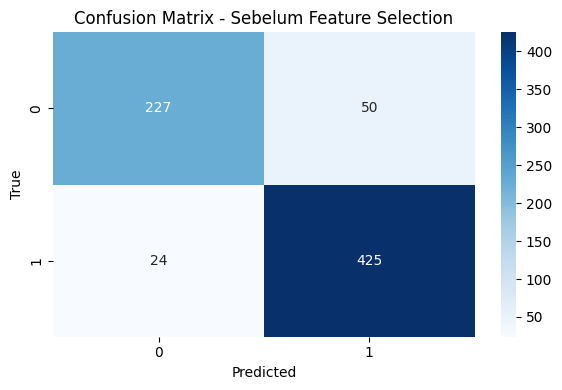


=== SETELAH Feature Selection ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Akurasi Random Forest: 0.8980716253443526


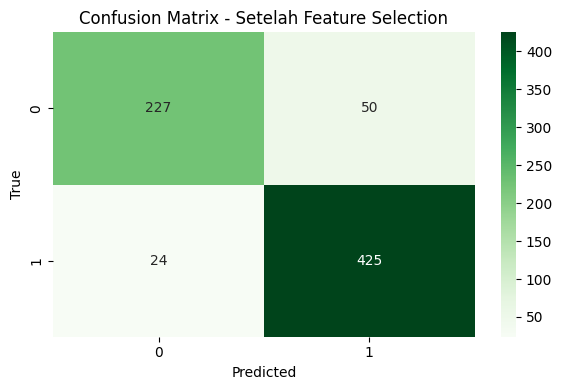

In [29]:
# ============================
# SEBELUM Feature Selection
# ============================
print("=== SEBELUM Feature Selection ===")
print(classification_report(y_test, y_pred_rf))
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Sebelum Feature Selection')
plt.tight_layout()
plt.show()


# ============================
# SETELAH Feature Selection
# ============================
print("\n=== SETELAH Feature Selection ===")
print(classification_report(y_test, y_pred))
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred))

cm_rf_reduced = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_reduced, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Setelah Feature Selection')
plt.tight_layout()
plt.show()

Perbandingan antara model random forest yang awal yang menggunakan data dengan semua fitur-fitur yang dipilih berdasarkan nilai korelasi diawal tadi dan model random forest yang dilatih dengan fitur-fitur tersisa setelah melakukan dropping terhadap fitur-fitur yang dianggap kurang berkontribusi terhadap model.

Kesimpulannya adalah:
Dari data awal yang berjumlah 37 fitur termasuk kolom target yaitu 'Status', setelah dilakukan pemilihan fitur berdasarkan nilai korelasi setiap fitur terhadap fitur target, terdapat 19 fitur termasuk fitur target. Setelah itu, data tersebut dilatih dengan model random forest dan hasilnya menunjukkan akurasi sekitar 89.8 %. Lalu, untuk memastikan kontribusi fitur-fitur terhadap model random forest tadi sudah baik, saya menggunakan feature importance untuk melihatnya, dan hasilnya menunjukkan ada beberapa fitur yang tidak terlalu berkontribusi terhadap model random forest tadi, jadi saya lakukan drop fitur-fitur tersebut. Tersisa 12 fitur termasuk fitur target, lalu saya latih kembali model random forest dengan data tersebut, hasilnya menunjukkan akurasi sekitar 89.8%. Jadi, dengan pertimbangan kompleksitas model dan akurasi yang sama pada kedua model tersebut, saya memilih model random forest yang menggunakan 12 fitur termasuk fitur target untuk digunakan oleh tim Edutech Jaya Jaya Maju untuk melakukan prediksi awal  seorang siswa akan dropout atau tidak berdasarkan fitur-fitur tersebut dan melakukan antisipasi untuk dapat mencegah siswa yang kemungkinan akan dropout tersebut.

In [30]:
import joblib

# Simpan scaler dan model
joblib.dump(scalernew, 'scaler_jjinstitut.joblib')
joblib.dump(rf_model, 'randomforest_model.joblib')

['randomforest_model.joblib']